# IT - 507 Advanced Image Processing Assignment - 4

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
lena_path = "lena_face.jpg"
skeleton_path = "skeleton.jpg"

## 1. Find out the difference between averaging operation and weighted averaging (higher weight to center pixel) operation on Fig. 1 by applying spatial filtering. For this purpose, convolve the image with 9 × 9 masks (averaging mask and weighted averaging mask).
<img src="lena_face.jpg" width=200 height=200 /><br>
### &emsp;&emsp;&emsp;&emsp;&emsp;Fig.1

In [0]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Rotate 180 degree
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[padding:(-1 * padding), padding:(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

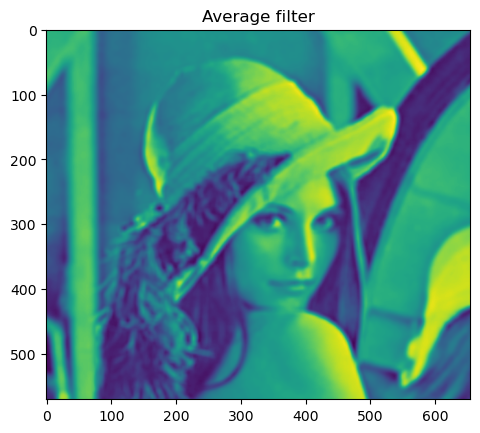

In [0]:
# Low Pass SPatial Domain Filtering 
# to observe the blurring effect 
mask_size = 9

# Read the image 
lena_img = cv2.imread(lena_path, 0)   

# Generate Averaging filter (9, 9) mask 
avg_mask = np.ones([mask_size, mask_size]) 
avg_mask = avg_mask / avg_mask.size

lena_new_img = convolve2D(lena_img, avg_mask)
lena_new_img = lena_new_img.astype(np.uint8)
plt.imshow(lena_new_img)
plt.title("Average filter")
cv2.imwrite("lena_avgfilter_convolve_9.jpg", lena_new_img)

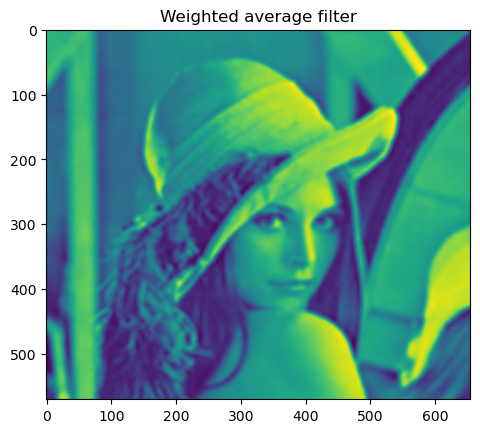

In [0]:
# Generate Weighted Averaging Filter (9, 9) mask
w_mask = np.ones([mask_size,mask_size])
w_mask = w_mask / w_mask.size
w_mask[int(mask_size/2), int(mask_size/2)] *= 4

lena_new_img = convolve2D(lena_img, w_mask)
lena_new_img = lena_new_img.astype(np.uint8)
plt.imshow(lena_new_img)
plt.title("Weighted average filter")
cv2.imwrite("lena_w_avgfilter_convolve_9.jpg", lena_new_img)

## 2. Consider the image of Fig.1 and apply unsharp masking and highboost filtering to enhance the edges of the image. Consider a row of the original image and plot the intensity values. This kind of plot is known as intensity profile of that row. Plot similar intensity profiles (consider the same row) for the blurred image, unsharp mask, sharpened image, and the high-boost filtered image. Explain your observation.

In [0]:
# lena_img = cv2.imread(lena_path, 0)
# result1 = unsharp_mask(lena_img, radius=np.var(lena_img)**0.5, amount=1)
# plt.imshow(result1)
# cv2.imwrite('lena_unsharp_img.jpg',lena_img)

(579, 663)


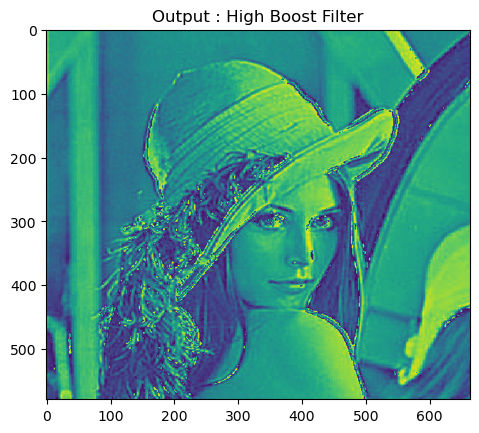

In [0]:
image = cv2.imread(lena_path, 0)
print(image.shape)
plt.imshow(image)
plt.title("Input")

gauss_mask = cv2.GaussianBlur(image, (9, 9), 10.0)

plt.figure()
plt.imshow(gauss_mask)
plt.title("Blurr Image")
cv2.imwrite("Guassian_blur.jpg",gauss_mask)


g_mask = image - gauss_mask
plt.figure()
image_sharp = image + g_mask
plt.imshow(image_sharp)
plt.title("Output : Sharpen")
cv2.imwrite("lena_unsharp_masking.jpg", image_sharp)
# #High pass Kernel 3x3 (Laplacian)
# kernel = np.array([[-1, -1, -1],
#                    [-1,  8, -1],
#                    [-1, -1, -1]])

image_hbf = image + 2*g_mask
plt.figure()
plt.imshow(image_hbf)
plt.title("Output : High Boost Filter")
cv2.imwrite("lena_highboost_filter.jpg", image_hbf)

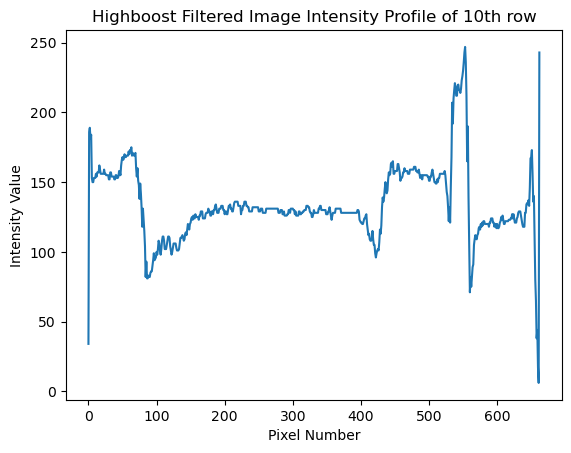

In [0]:
# Plot intensity profiles of lena image and its filtered versions
row = 10
pixels_in_row = image.shape[1]

image_row = image[row]
blur_image_row = gauss_mask[row]
unsharp_mask_row = g_mask[row]
image_sharp_row = image_sharp[row]
image_hbf_row = image_hbf[row]

plt.plot(range(pixels_in_row), image_row)
plt.title(f"Original Image Intensity Profile of {row}th row")
plt.xlabel("Pixel Number")
plt.ylabel("Intensity Value")
plt.savefig(f"orig_intensity_prof_{row}_row.png")

plt.figure()
plt.plot(range(pixels_in_row), blur_image_row)
plt.title(f"Blurred Image Intensity Profile of {row}th row")
plt.xlabel("Pixel Number")
plt.ylabel("Intensity Value")
plt.savefig(f"blur_intensity_prof_{row}_row.png")

plt.figure()
plt.plot(range(pixels_in_row), unsharp_mask_row)
plt.title(f"Unsharp Mask Intensity Profile of {row}th row")
plt.xlabel("Pixel Number")
plt.ylabel("Intensity Value")
plt.savefig(f"unsharp_mask_intensity_prof_{row}_row.png")

plt.figure()
plt.plot(range(pixels_in_row), image_sharp_row)
plt.title(f"Sharpened Image Intensity Profile of {row}th row")
plt.xlabel("Pixel Number")
plt.ylabel("Intensity Value")
plt.savefig(f"sharp_img_intensity_prof_{row}_row.png")

plt.figure()
plt.plot(range(pixels_in_row), image_hbf_row)
plt.title(f"Highboost Filtered Image Intensity Profile of {row}th row")
plt.xlabel("Pixel Number")
plt.ylabel("Intensity Value")
plt.savefig(f"highboost_filter_intensity_prof_{row}_row.png")

## 3. Smooth the image of Fig.1 by using Bilateral filtering. Compare the result with average filtering and weighted average filtering. Which result is better? – Explain your understanding.

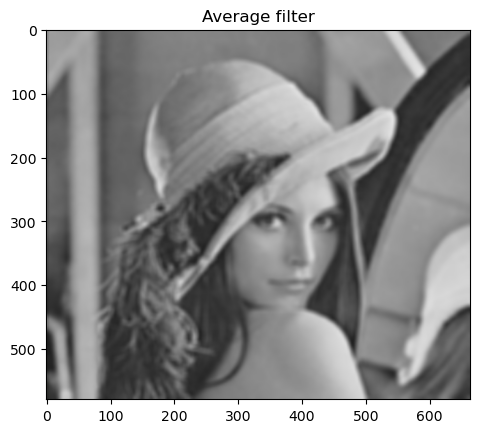

In [0]:
# Read the image. 
img = cv2.imread(lena_path) 
  
# Apply bilateral filter with d = 15,  
# sigmaColor = sigmaSpace = 75. 
bilateral = cv2.bilateralFilter(img, 15, 75, 75)

# Save the output.
plt.imshow(bilateral)
cv2.imwrite("lena_bilateral.jpg", bilateral)
# cv2.imwrite('taj_bilateral.jpg', bilateral) 

# Average filter
kernel = np.ones((9,9),np.float32)/81
avg_filter = cv2.filter2D(img,-1,kernel)

plt.figure()
plt.imshow(avg_filter)
plt.title("Average filter")

## 4. Consider the image of Fig.2 and process it to bring out more skeletal detail. (You may use combination of sharpening and smoothing operations).

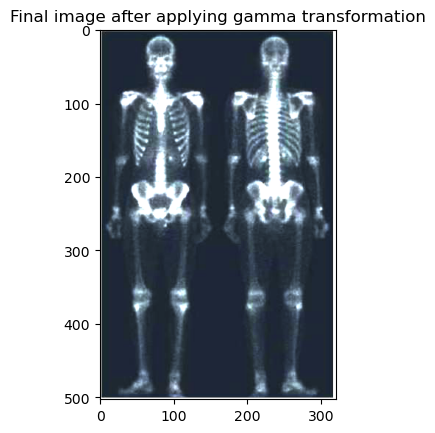

In [0]:
image = cv2.imread(skeleton_path)
plt.imshow(image)
plt.title("Skeleton Input Image")

kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

# blur_img = cv2.GaussianBlur(image, (3, 3), 0.0)

Laplacian_filter=cv2.filter2D(image, -1, kernel)

#this image will give us the sharpen edge
plt.figure()
plt.imshow(Laplacian_filter)
plt.title("Laplacian of Skeleton Image")
cv2.imwrite("laplacian_skeleton.jpg", Laplacian_filter)

Lap_img = np.uint8(cv2.add(image, Laplacian_filter))

plt.figure()
plt.imshow(Lap_img)
plt.title("Sharpened Image after adding its laplacian")
cv2.imwrite("lap_sharpened_skeleton.jpg", Lap_img)

sobel_x_kernel = np.array([[-1,-2,-1],
                            [0,0,0],
                           [1,2,1]])
sobel_y_kernel = sobel_x_kernel.T

sobel_img_x = cv2.filter2D(image.astype('float32'), -1, sobel_x_kernel)
sobel_img_y = cv2.filter2D(image.astype('float32'), -1, sobel_y_kernel)

sobel_img = np.uint8(cv2.magnitude(np.float32(sobel_img_x), np.float32(sobel_img_y)))
plt.figure()
plt.imshow(sobel_img)
plt.title("Sobel gradient Image")
cv2.imwrite("sobel_skeleton.jpg", sobel_img)

# Average filter on sobel image
kernel_avg = np.ones((5, 5), np.float32) / 25
sobel_avg = np.uint8(cv2.filter2D(sobel_img.astype('float32'), -1, kernel_avg))
plt.figure()
plt.imshow(sobel_avg)
plt.title("Apply Avg filter on sobel filter")
cv2.imwrite("avg_sobel_skeleton.jpg", sobel_avg)

# Multiplication of avg_sobel with sharp image, generating mask image 
# avg_sobel_lap = np.uint8(Lap_img * sobel_avg)
# avg_sobel_lap = np.uint8(cv2.multiply(Lap_img, sobel_avg))
avg_sobel_lap = np.uint8(cv2.bitwise_or(Lap_img, sobel_avg))

plt.figure()
plt.imshow(avg_sobel_lap)
plt.title("Multiplication of avg_sobel with Laplacian filter * image")
cv2.imwrite("lap_sharp_avg_sobel_skeleton.jpg", avg_sobel_lap)

# Get sharpen image 
sharpen_img = np.uint8(cv2.add(image, image, mask=cv2.cvtColor(avg_sobel_lap, cv2.COLOR_BGR2GRAY)))
plt.figure()
plt.imshow(sharpen_img)
plt.title("Sharpen image formed by addition of image with (avg_sobel*(laplacian filter+image))")
cv2.imwrite("sharpened_skeleton.jpg", sharpen_img)

# Apply power gamma transformation
final_img = np.array(255*(sharpen_img / 255) ** 3, dtype = 'uint8')
plt.figure()
plt.imshow(final_img)
plt.title("Final image after applying gamma transformation")
cv2.imwrite("final_gamma_sharpened_skeleton.jpg", final_img)